<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Band Structure__


### Band Structure and the Periodic Potential

To understand the emergence of band structures in solids, we consider the effects of a periodic potential on electrons. When a weak periodic perturbation is added to the free electron model, the energy levels evolve into continuous bands. The corresponding eigenstates $\psi_{k,n}(x)$ and energy levels $E_n(k)$ constitute the **band structure** of the material.

In crystalline solids, the potential experienced by electrons is periodic due to the regular arrangement of nuclei. A one-dimensional model can capture the essential features of this periodicity. For a periodic potential with period $a$, we have:

$$
V(x + a) = V(x)
$$

**Bloch's Theorem** states that the solutions to the time-independent Schrödinger equation with such a potential,

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E\psi,
$$

can be chosen to satisfy:

$$
\psi(x + a) = e^{iqa} \psi(x),
$$

where $q$ is a constant (possibly energy-dependent). This implies that the probability density $|\psi(x)|^2$ is periodic:

$$
|\psi(x + a)|^2 = |\psi(x)|^2
$$

To preserve periodicity in a finite system, we impose the boundary condition:

$$
\psi(x + Na) = \psi(x)
$$

for a large integer $N$, corresponding to a macroscopic number of lattice sites. This leads to quantization of $q$:

$$
q = \frac{2\pi n}{Na}, \quad n = 0, \pm1, \pm2, \ldots
$$


### **Griffith Example:**

We now consider a simple periodic potential: the **Dirac comb**, consisting of delta functions located at $x = ja$ for $j = 0, 1, \ldots, N - 1$:

$$
V(x) = \alpha \sum_{j=0}^{N-1} \delta(x - ja)
$$
![Dirac Comb Potential](Dirac_Pot.png)


Within the unit cell $0 < x < a$, the potential vanishes and the Schrödinger equation reduces to:

$$
\frac{d^2\psi}{dx^2} = -k^2\psi, \quad k = \sqrt{\frac{2mE}{\hbar^2}}
$$

The general solution in this region is:

$$
\psi(x) = A \sin(kx) + B \cos(kx)
$$

Applying Bloch's theorem, the wavefunction in the adjacent cell is:

$$
\psi(x) = e^{-iqa} \left[ A \sin(k(x + a)) + B \cos(k(x + a)) \right], \quad -a < x < 0
$$

Continuity of the wavefunction at $x = 0$ gives:

$$
B = e^{-iqa} [A \sin(ka) + B \cos(ka)]
$$

The derivative of $\psi$ has a discontinuity at the delta spike proportional to the strength $\alpha$:

$$
kA - e^{-iqa}k [A \cos(ka) - B \sin(ka)] = \frac{2m\alpha}{\hbar^2} B
$$

Eliminating $A$ and simplifying leads to the **dispersion relation**:

$$
\cos(qa) = \cos(ka) + \frac{m\alpha}{\hbar^2 k} \sin(ka)
$$

Defining dimensionless variables $z = ka$ and $\beta = \frac{m\alpha a}{\hbar^2}$, the right-hand side becomes a function:

$$
f(z) = \cos(z) + \beta \frac{\sin(z)}{z}
$$

This transcendental equation determines the allowed values of $k$ and thus the permitted energy levels. The structure of this equation reveals energy **bands** where solutions exist (i.e., $|f(z)| \leq 1$), separated by **band gaps** where no solutions are possible.


In [1]:
# Main libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Parameters
beta = 10  # Dimensionless strength parameter
N = 100    # Large number of states per band
n_values = np.arange(N)  # Integer values for Bloch factor

In [3]:
# Define the function f(z)
def f(z, beta):
    return np.cos(z) + beta * np.sin(z) / z

# Generate z values
z = np.linspace(0.01, 5 * np.pi, 1000)  # Avoid z=0 to prevent division by zero

# Compute f(z)
f_z = f(z, beta)

# Read Image 
img = mpimg.imread('Griffith.png')

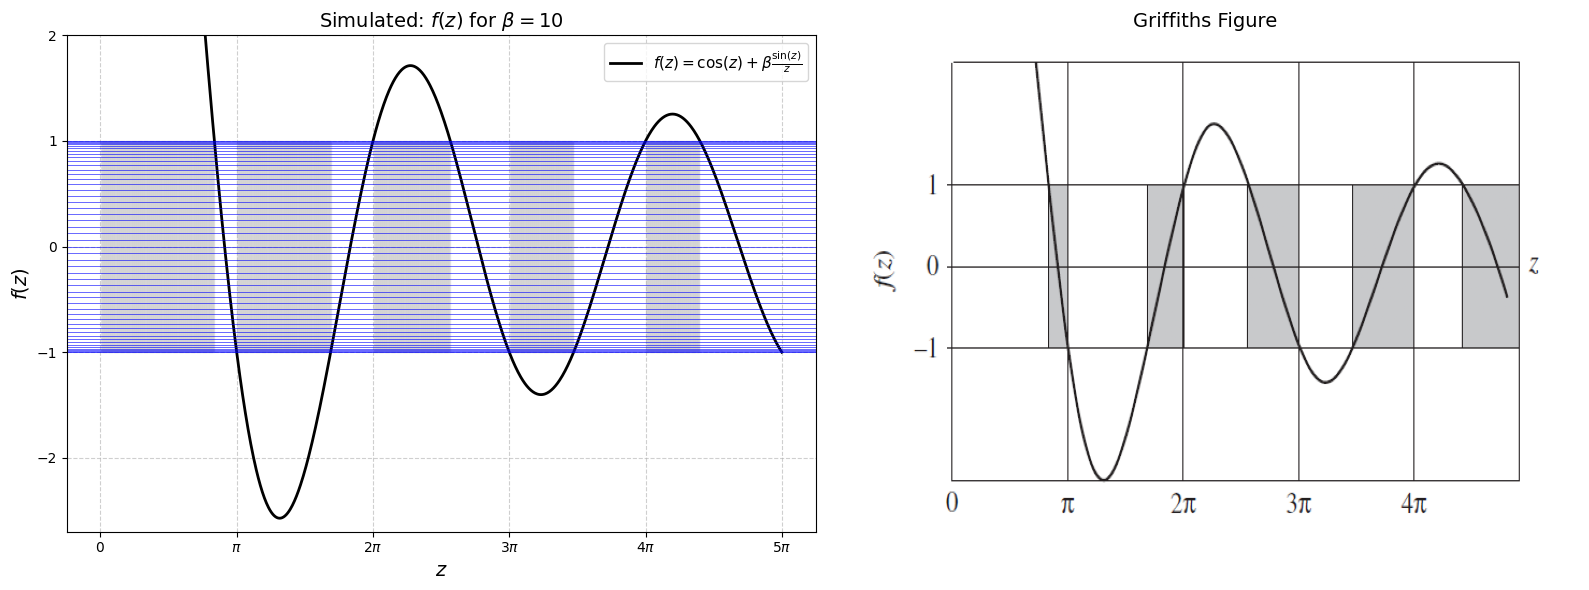

In [4]:
#Create Subplot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Simulation
axs[0].plot(z, f_z, color='black', lw=2, label=r'$f(z) = \cos(z) + \beta \frac{\sin(z)}{z}$')
axs[0].set_xlabel(r'$z$', fontsize=14)
axs[0].set_ylabel(r'$f(z)$', fontsize=14)
axs[0].set_title(r'Simulated: $f(z)$ for $\beta = 10$', fontsize=14)
axs[0].set_xticks(np.arange(0, 6 * np.pi, np.pi))
axs[0].set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
axs[0].set_ylim(-2.7, 2)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Highlight forbidden gaps where |f(z)| > 1
for i in range(len(z) - 1):
    if abs(f_z[i]) > 1 and abs(f_z[i + 1]) > 1:
        axs[0].fill_between([z[i], z[i + 1]], -1, 1, color='lightgray', alpha=0.5)

# Add horizontal lines for allowed energies (Bloch factors)
for n in n_values:
    cos_qa = np.cos(2 * np.pi * n / N)
    if -1 <= cos_qa <= 1:  # Only plot within visible range
        axs[0].axhline(cos_qa, color='blue', linewidth=0.5, alpha=0.5)

axs[0].legend(fontsize=11)

# Griffiths Figure
axs[1].imshow(img, aspect='auto')
axs[1].set_title('Griffiths Figure', fontsize=14)
axs[1].axis('off') 


# Adjust layout
plt.tight_layout()
plt.show()

---